In [3]:
import os
print(os.getcwd())

C:\Users\Shine


In [7]:
import os
print("Current directory:", os.getcwd())

Current directory: C:\Users\Shine


In [13]:
import pandas as pd

# Use the correct file names
trades = pd.read_csv("hyperliquid_trades.csv.csv")
sentiment = pd.read_csv("fear_greed_index.csv.csv")

print("✅ Files loaded successfully!")
print(trades.head())
print(sentiment.head())


✅ Files loaded successfully!
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order 

In [15]:
# STEP 1: Convert dates
trades['Date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
sentiment['Date'] = pd.to_datetime(sentiment['date'])

# STEP 2: Merge on Date (left join so we keep all trades)
df = pd.merge(trades, sentiment[['Date', 'classification']], on='Date', how='left')

# Check result
print(df[['Date', 'classification', 'Closed PnL', 'Size USD']].head())


                 Date classification  Closed PnL  Size USD
0 2024-12-02 22:50:00            NaN         0.0   7872.16
1 2024-12-02 22:50:00            NaN         0.0    127.68
2 2024-12-02 22:50:00            NaN         0.0   1150.63
3 2024-12-02 22:50:00            NaN         0.0   1142.04
4 2024-12-02 22:50:00            NaN         0.0     69.75


In [17]:
# STEP 3: Group by sentiment classification
grouped = df.groupby('classification')['Closed PnL'].mean().reset_index()

# Show average PnL by sentiment
print(grouped)


  classification  Closed PnL
0   Extreme Fear  -23.260258
1  Extreme Greed    8.401634
2           Fear    3.269807
3          Greed    7.398914
4        Neutral    0.000000


C:\Users\Shine\AppData\Local\Temp\ipykernel_16700\1147416257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='classification', y='Closed PnL', palette='viridis')
C:\Users\Shine\AppData\Local\Temp\ipykernel_16700\1147416257.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shine\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


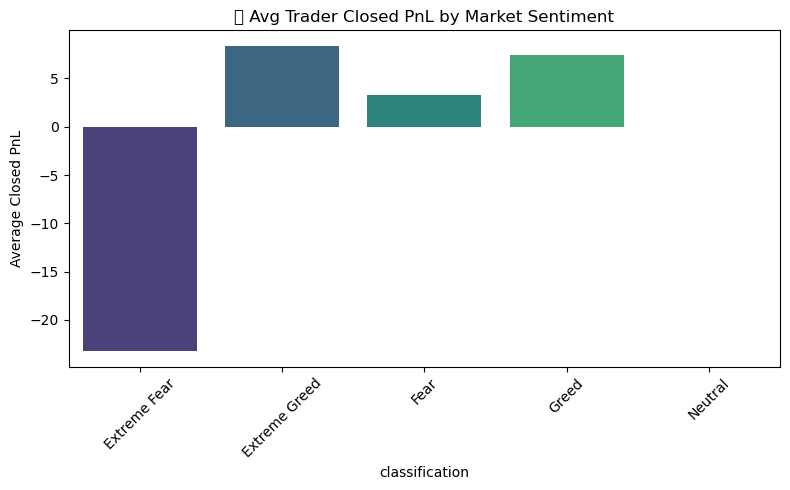

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='classification', y='Closed PnL', palette='viridis')
plt.title("📊 Avg Trader Closed PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()


C:\Users\Shine\AppData\Local\Temp\ipykernel_16700\2105264970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vol, x='classification', y='Size USD', palette='coolwarm')
C:\Users\Shine\AppData\Local\Temp\ipykernel_16700\2105264970.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Shine\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


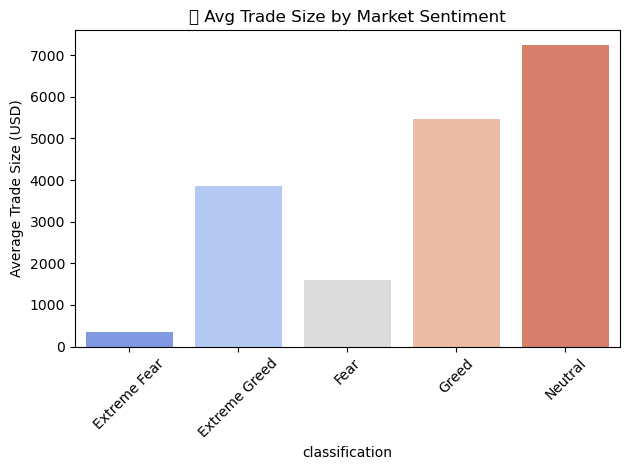

In [21]:
# Optional: Compare trade volume by sentiment
df['Size USD'] = pd.to_numeric(df['Size USD'], errors='coerce')
vol = df.groupby('classification')['Size USD'].mean().reset_index()

sns.barplot(data=vol, x='classification', y='Size USD', palette='coolwarm')
plt.title("📊 Avg Trade Size by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Trade Size (USD)")
plt.tight_layout()
plt.show()


C:\Users\Shine\AppData\Local\Temp\ipykernel_16700\3334854931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl, x='classification', y='Closed PnL', palette='magma')


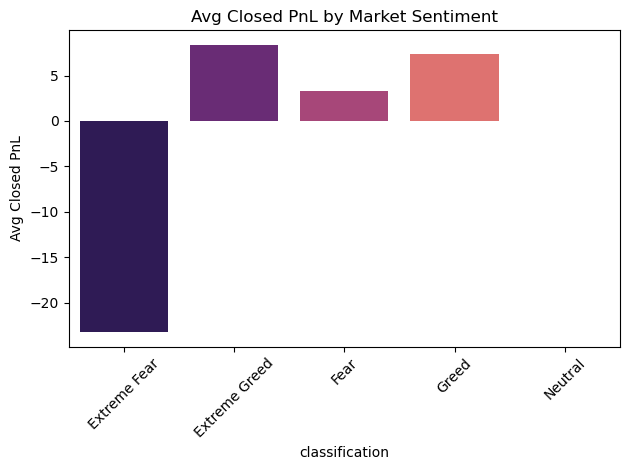

In [23]:
pnl = df.groupby('classification')['Closed PnL'].mean().reset_index()

sns.barplot(data=pnl, x='classification', y='Closed PnL', palette='magma')
plt.title("Avg Closed PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
